In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Analyse du dataset

In [2]:
#1) 
food = pd.read_csv('fastfood.csv') #importation du fichier
food = food.set_index("item") #colonne item choisie comme colonne des index
food.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
#2) dimension de la matrice de données
food.shape

(515, 16)

In [4]:
#3) vérification de la présence des valeurs manquantes
food.isna()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Single Bacon Smokehouse Burger,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Double Bacon Smokehouse Burger,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Grilled Bacon Smokehouse Chicken Sandwich,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Crispy Bacon Smokehouse Chicken Sandwich,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Express Taco Salad w/ Chips,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
Fiesta Taco Salad-Beef,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False


In [5]:
food = food.dropna(axis = 0) # Suppression des valeurs manquantes
food.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [6]:
#4) Nombre d'individus dans le nouveau jeu de données
food.shape

(301, 16)

In [7]:
#5) Nombre de restaurants pris dans le nouveau jeu de données
food.columns
food['restaurant'].unique().size

7

In [8]:
food.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [9]:
# Nombre de restaurants vendant des alimenst produisant plus de 1000 calories
foodc = food[food['calories']>1000]
foodc['restaurant'].unique().size #restaurants uniques ayant des calories > 1000 

4

In [10]:
foodc['restaurant'].size#restaurants ayant des calories > 1000 

19

In [11]:
foodc['restaurant'].unique()

array(['Mcdonalds', 'Sonic', 'Dairy Queen', 'Subway'], dtype=object)

In [12]:
#Restaurant aynat le plus grand nombre d'aliments ayant plus de 1000 calories
foodc['restaurant'].max()

'Subway'

In [13]:
#7) Plus grande valeur en calories
food['calories'].max()

2430

In [14]:
# Restaurant ayant la plus grande valeur en calories
restaur = food[food['calories']==2430]
restaur['restaurant']

item
20 piece Buttermilk Crispy Chicken Tenders    Mcdonalds
Name: restaurant, dtype: object

In [15]:
food.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [16]:
# Pour vérifier si le restaurant ayant la plus grande valeur en calories contient également de la vitamine a. Non apparemment
restaur.loc[:,['restaurant','vit_a']]

,restaurant,vit_a
item,,
20 piece Buttermilk Crispy Chicken Tenders,Mcdonalds,0.0


In [17]:
Food = food.drop(['restaurant','salad'], axis = 1)
Food.head()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


In [18]:
#8) fonction distance, qui calcule la distance entre 2 individus
def distance(x,y):
    return (np.sum((x-y)**2)**(1/2))

In [22]:
# matrix = linkage(Food,"ward")
# linkmat = pd.DataFrame(matrix, index = np.arange(1,n,1), columns = ["Ind 1", "Ind 2", "Distance", "Poids"])
# print(linkmat)

In [23]:
# nivCoup = 2000
# plt.figure(figsize = (60,45))
# dendrogram(linkmat, labels = rowdist.index, distance_sort = 'ward' ,orientation = 'top', color_threshold = nivCoup)
# plt.plot([0,150],[nivCoup,nivCoup], color ='silver', linestyle = '--', linewidth = 2)
# plt.title('Dendogram')
# plt.xlabel ('aliments')
# plt.tick_params(axis = 'x', rotation = -60)
# plt.show()

# Analyse en composante principale

In [24]:
food.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [57]:
#1) Création de la variable McDo avec les produit du restaurant Mcdonalds
McDo = food.loc[food['restaurant'] == 'Mcdonalds']
McDo.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [58]:
McDo['restaurant'].unique().size

1

In [62]:
#Suppression des colonnes 'restaurant' et 'Salad'
McDo = McDo.drop(['restaurant','salad'], axis = 1, inplace=True)

In [69]:
McDo = McDo.head(15)
McDo

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0
Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0
Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0
Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0


In [71]:
#Verification
McDo.shape

(15, 14)

In [73]:
n,p= McDo.shape[0], McDo.shape[1]
print('n',{n},'\np',{p})

n {15} 
p {14}


In [74]:
rowdist = pd.DataFrame(np.zeros(shape = (n,n), dtype = float), index = McDo.index, columns = McDo.index)
for i in range(n):
    for j in range(n):
        rowdist.values[i,j] = distance(McDo.values[i,:],McDo.values[j,:]).round(2)
rowdist

item,Artisan Grilled Chicken Sandwich,Single Bacon Smokehouse Burger,Double Bacon Smokehouse Burger,Grilled Bacon Smokehouse Chicken Sandwich,Crispy Bacon Smokehouse Chicken Sandwich,Big Mac,Cheeseburger,Classic Chicken Sandwich,Double Cheeseburger,Double Quarter Pounder® with Cheese,Filet-O-Fish®,Garlic White Cheddar Burger,Grilled Garlic White Cheddar Chicken Sandwich,Crispy Garlic White Cheddar Chicken Sandwich,Hamburger
item,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,0.00,747.23,1237.94,937.64,1083.82,297.60,443.89,215.13,159.55,555.85,486.97,467.82,199.74,410.02,647.67
Single Bacon Smokehouse Burger,747.23,0.00,495.96,394.43,408.52,718.67,1099.73,668.36,715.89,303.35,1078.86,828.70,578.93,431.89,1299.25
Double Bacon Smokehouse Burger,1237.94,495.96,0.00,504.17,310.37,1198.69,1586.94,1158.59,1207.32,755.72,1557.77,1282.95,1068.75,910.57,1782.13
Grilled Bacon Smokehouse Chicken Sandwich,937.64,394.43,504.17,0.00,222.03,1016.14,1356.21,939.52,963.28,662.62,1362.15,1159.59,827.17,755.79,1563.83
Crispy Bacon Smokehouse Chicken Sandwich,1083.82,408.52,310.37,222.03,0.00,1111.26,1477.11,1047.60,1084.92,709.80,1468.13,1233.14,946.56,828.64,1681.78
Big Mac,297.60,718.67,1198.69,1016.14,1111.26,0.00,393.93,105.68,155.26,448.63,360.67,187.86,219.36,294.69,583.88
Cheeseburger,443.89,1099.73,1586.94,1356.21,1477.11,393.93,0.00,432.55,396.20,839.15,114.28,399.12,537.97,681.85,208.88
Classic Chicken Sandwich,215.13,668.36,1158.59,939.52,1047.60,105.68,432.55,0.00,89.59,424.86,423.76,291.69,137.06,262.59,634.64
Double Cheeseburger,159.55,715.89,1207.32,963.28,1084.92,155.26,396.20,89.59,0.00,481.40,406.74,334.28,158.27,330.77,603.55


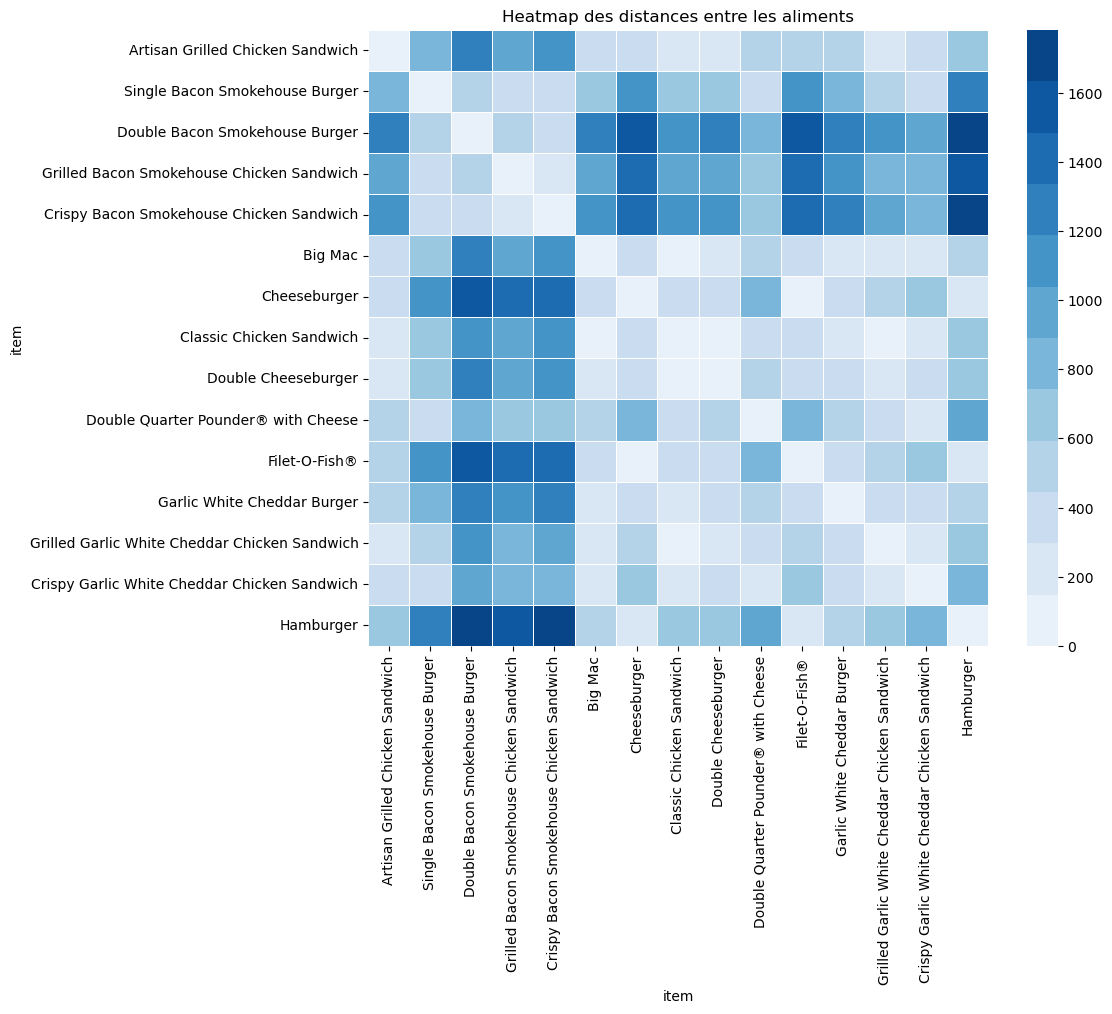

In [77]:
#2) Heatmap des distances entre les aliments de food
plt.figure(figsize = (10,8))
sns.heatmap(rowdist, cmap = sns.color_palette("Blues",12), linewidths= 0.5)
plt.title('Heatmap des distances entre les aliments')
plt.show()

In [78]:
#3) heatmap des coorelations croisées
cor = McDo.corr(method = 'pearson').round(2)
cor

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
calories,1.00,0.97,0.97,0.85,0.67,0.87,0.87,0.82,0.40,0.85,0.89,0.20,0.63,0.65
cal_fat,0.97,1.00,1.00,0.92,0.78,0.81,0.75,0.69,0.32,0.72,0.80,0.28,0.43,0.62
total_fat,0.97,1.00,1.00,0.93,0.79,0.82,0.74,0.69,0.33,0.72,0.80,0.29,0.43,0.63
sat_fat,0.85,0.92,0.93,1.00,0.94,0.85,0.61,0.42,0.13,0.61,0.77,0.53,0.32,0.62
trans_fat,0.67,0.78,0.79,0.94,1.00,0.74,0.40,0.15,-0.05,0.42,0.63,0.57,0.11,0.49
cholesterol,0.87,0.81,0.82,0.85,0.74,1.00,0.82,0.54,0.19,0.77,0.98,0.39,0.67,0.68
sodium,0.87,0.75,0.74,0.61,0.40,0.82,1.00,0.84,0.27,0.91,0.89,0.10,0.80,0.45
total_carb,0.82,0.69,0.69,0.42,0.15,0.54,0.84,1.00,0.60,0.83,0.67,-0.14,0.74,0.48
fiber,0.40,0.32,0.33,0.13,-0.05,0.19,0.27,0.60,1.00,0.21,0.25,0.07,0.29,0.45
sugar,0.85,0.72,0.72,0.61,0.42,0.77,0.91,0.83,0.21,1.00,0.86,0.01,0.88,0.56


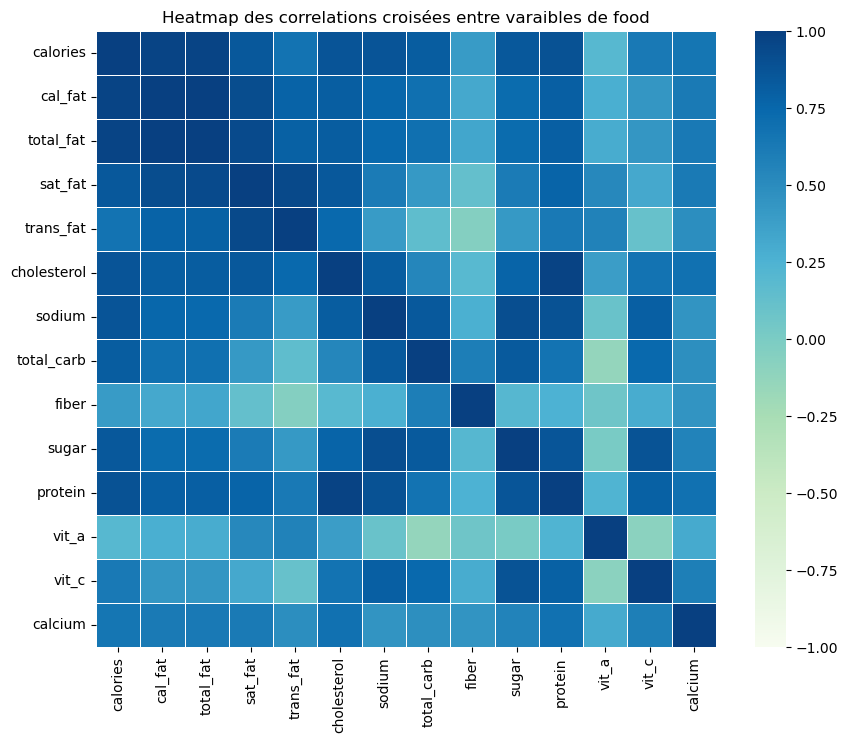

In [83]:
plt.figure(figsize = (10,8))
sns.heatmap(cor, cmap = "GnBu", vmin = -1, vmax = 1, center =0, linewidths= 0.5)
plt.title('Heatmap des correlations croisées entre varaibles de food')
plt.show()

In [85]:
#4) Calcul de la matrice des données centrées et réduites
def standardScaler(x):
    return (x-x.mean())/x.std(ddof=0)

DCR= food.transform(standardScaler).round(2)
DCR

NameError: name 'data' is not defined

# Clustering Ascendante Hierarchique